In [272]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib_venn import venn2
%matplotlib inline
from bioinfokit import analys, visuz

In [273]:
coding_genes = pd.read_csv('../ref_genome/mm39/m39_protein_genes_GC.txt')

In [274]:
coding_genes.head()

,Gene stable ID,Gene % GC content,Gene name
0,ENSMUSG00000064341,37.62,mt-Nd1
1,ENSMUSG00000064345,35.74,mt-Nd2
2,ENSMUSG00000064351,39.87,mt-Co1
3,ENSMUSG00000064354,38.60,mt-Co2
4,ENSMUSG00000064356,31.86,mt-Atp8


In [275]:
coding_genes['protein_coding'] = True

In [276]:
coding_genes.shape

(21885, 4)

In [277]:
male_ensembl = pd.read_csv('../data/brain/DESeq2_out/male.csv')

In [278]:
male_ensembl.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,C4b,884.716371,-2.956498,0.212674,-13.901526,6.200554e-44,1.380367e-39
1,Lyz2,330.079396,-2.293038,0.243512,-9.416516,4.663037e-21,5.190426e-17
2,Gfap,3998.894233,-1.226660,0.159915,-7.670683,1.710823e-14,1.269545e-10
3,Avp,105.836367,-1.970187,0.271699,-7.251357,4.126180e-13,2.296425e-09
4,H2-K1,456.366097,-1.273633,0.189811,-6.710010,1.946113e-11,7.220729e-08


In [279]:
male_ensembl.rename({'Unnamed: 0' : 'Gene name'}, axis = 1, inplace=True)

In [280]:
male_ensembl.shape

(53599, 7)

In [281]:
male_ensembl

,Gene name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,C4b,884.716371,-2.956498,0.212674,-13.901526,6.200554e-44,1.380367e-39
1,Lyz2,330.079396,-2.293038,0.243512,-9.416516,4.663037e-21,5.190426e-17
2,Gfap,3998.894233,-1.226660,0.159915,-7.670683,1.710823e-14,1.269545e-10
3,Avp,105.836367,-1.970187,0.271699,-7.251357,4.126180e-13,2.296425e-09
4,H2-K1,456.366097,-1.273633,0.189811,-6.710010,1.946113e-11,7.220729e-08
...,...,...,...,...,...,...,...
53594,Zscan4e,3.449161,0.364434,1.215639,0.299788,7.643392e-01,NaN
53595,Zscan4f,0.986277,2.538435,2.553220,0.994209,3.201210e-01,NaN
53596,Zscan5b,5.195822,0.220797,0.970424,0.227527,8.200142e-01,NaN
53597,Zxda,3.454665,0.149340,1.136293,0.131427,8.954374e-01,NaN


In [282]:
#male_ensembl.dropna(axis=0, inplace=True)

In [283]:
male_ensembl.merge(coding_genes, how='inner',on='Gene name').shape # number of protein-coding genes

(21821, 10)

In [284]:
male_ensembl = male_ensembl.merge(coding_genes, how='left',on='Gene name')

In [285]:
male_ensembl.shape

(53621, 10)

In [286]:
male_ensembl.head()

,Gene name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene stable ID,Gene % GC content,protein_coding
0,C4b,884.716371,-2.956498,0.212674,-13.901526,6.200554e-44,1.380367e-39,ENSMUSG00000073418,54.98,True
1,Lyz2,330.079396,-2.293038,0.243512,-9.416516,4.663037e-21,5.190426e-17,ENSMUSG00000069516,47.08,True
2,Gfap,3998.894233,-1.226660,0.159915,-7.670683,1.710823e-14,1.269545e-10,ENSMUSG00000020932,50.78,True
3,Avp,105.836367,-1.970187,0.271699,-7.251357,4.126180e-13,2.296425e-09,ENSMUSG00000037727,58.60,True
4,H2-K1,456.366097,-1.273633,0.189811,-6.710010,1.946113e-11,7.220729e-08,ENSMUSG00000061232,53.80,True


In [287]:
male_ensembl[male_ensembl.protein_coding == True]["Gene % GC content"].mean()

45.69345492873821

In [340]:
male_Refseq = pd.read_csv('../data/brain/DESeq2_out/male_Refseq.csv')

In [341]:
male_Refseq

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,C4b,858.563029,-2.877721,0.310608,-9.264796,1.954513e-20,6.315813e-16
1,Lyz2,322.011325,-2.160588,0.319980,-6.752265,1.455548e-11,2.351729e-07
2,Avp,102.834011,-1.862339,0.350985,-5.306030,1.120387e-07,1.206806e-03
3,Lgals3,50.738030,-1.794112,0.370047,-4.848334,1.245026e-06,1.005795e-02
4,Lcn2,19.175035,-3.442883,0.749815,-4.591643,4.397695e-06,2.842142e-02
...,...,...,...,...,...,...,...
39745,Zfp91,0.000000,NaN,NaN,NaN,NaN,NaN
39746,Zfp965,0.000000,NaN,NaN,NaN,NaN,NaN
39747,Zfp972,0.000000,NaN,NaN,NaN,NaN,NaN
39748,Zfp988,0.000000,NaN,NaN,NaN,NaN,NaN


In [342]:
male_Refseq.shape

(39750, 7)

In [343]:
male_Refseq.dropna(axis=0, inplace=True)

In [344]:
male_Refseq.shape

(32314, 7)

In [345]:
male_Refseq.rename({'Unnamed: 0' : 'Gene name'}, axis = 1, inplace=True)

In [346]:
male_Refseq.merge(coding_genes, how='inner',on='Gene name').shape

(20117, 10)

In [347]:
male_Refseq.shape

(32314, 7)

In [348]:
male_Refseq = male_Refseq.merge(coding_genes, how='left',on='Gene name')

In [349]:
male_Refseq.head()

,Gene name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene stable ID,Gene % GC content,protein_coding
0,C4b,858.563029,-2.877721,0.310608,-9.264796,1.954513e-20,6.315813e-16,ENSMUSG00000073418,54.98,True
1,Lyz2,322.011325,-2.160588,0.319980,-6.752265,1.455548e-11,2.351729e-07,ENSMUSG00000069516,47.08,True
2,Avp,102.834011,-1.862339,0.350985,-5.306030,1.120387e-07,1.206806e-03,ENSMUSG00000037727,58.60,True
3,Lgals3,50.738030,-1.794112,0.370047,-4.848334,1.245026e-06,1.005795e-02,ENSMUSG00000050335,46.72,True
4,Lcn2,19.175035,-3.442883,0.749815,-4.591643,4.397695e-06,2.842142e-02,ENSMUSG00000026822,54.70,True


In [298]:
male_Refseq[male_Refseq.protein_coding == True]['Gene % GC content'].mean()

45.66644280956409

In [300]:
male_Refseq.set_index('Gene name').corrwith(male_ensembl.set_index('Gene name'), axis = 0)

baseMean             0.887942
log2FoldChange       0.676904
lfcSE                0.820088
stat                 0.764722
pvalue               0.530700
padj                 0.442189
Gene % GC content    0.999506
dtype: float64

In [301]:
diff_male_ensembl = male_ensembl[((male_ensembl.padj < 0.1) & (male_ensembl.log2FoldChange > 0.14)) | 
                                (male_ensembl.padj < 0.1) & (male_ensembl.log2FoldChange < - 0.42)]

In [302]:
diff_male_Refseq = male_Refseq[((male_Refseq.padj < 0.1) & (male_Refseq.log2FoldChange > 0.14)) | 
                                (male_Refseq.padj < 0.1) & (male_Refseq.log2FoldChange < - 0.42)]

In [305]:
diff_male_ensembl[(diff_male_ensembl.protein_coding == True) & 
                 (diff_male_ensembl.log2FoldChange < 0.14)].shape

(82, 10)

In [307]:
diff_male_Refseq[(diff_male_Refseq.protein_coding == True) & 
                 (diff_male_Refseq.log2FoldChange > 0.14)].shape

(1, 10)

In [184]:
male_Refseq.head(2)

,Gene name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene stable ID,Gene % GC content,protein_coding
0,C4b,858.563029,-2.877721,0.310608,-9.264796,1.954513e-20,6.315813e-16,ENSMUSG00000073418,54.98,True
1,Lyz2,322.011325,-2.160588,0.319980,-6.752265,1.455548e-11,2.351729e-07,ENSMUSG00000069516,47.08,True


In [222]:
visuz.gene_exp.volcano(df=male_ensembl[male_ensembl.protein_coding == True], 
                       lfc='log2FoldChange', pv='padj', lfc_thr=(0.14, 0.42), pv_thr=(0.1, 0.1),
                      plotlegend=True, legendpos='upper right',
                      color=("red", "grey", "green"), sign_line=True, figname='ensembl_volcano')

In [223]:
visuz.gene_exp.volcano(df=male_Refseq[male_Refseq.protein_coding == True], 
                       lfc='log2FoldChange', pv='padj', lfc_thr=(0.14, 0.42), pv_thr=(0.1, 0.1),
                      plotlegend=True, legendpos='upper right',
                      color=("red", "grey", "green"), sign_line=True, figname='Refseq_volcano')

Text(0.5, 1.0, 'Differentially expressed protein-coding genes in male mice \n (according to different annotations, GRCm39)')

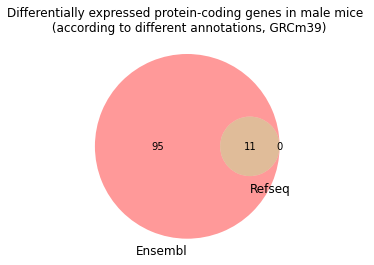

In [399]:
venn2([set(diff_male_ensembl[diff_male_ensembl.protein_coding == True]['Gene name']), 
       set(diff_male_Refseq[diff_male_Refseq.protein_coding == True]['Gene name'])], 
      set_labels = ('Ensembl', 'Refseq'))
plt.title("Differentially expressed protein-coding genes in male mice \n (according to different annotations, GRCm39)")

In [406]:
Ensembl_unique = diff_male_ensembl[diff_male_ensembl.protein_coding == True]['Gene name'][~diff_male_ensembl[diff_male_ensembl.protein_coding == True]['Gene name'].isin(diff_male_Refseq[diff_male_Refseq.protein_coding == True]['Gene name'].values)]

In [407]:
Ensembl_unique

4       H2-K1
6        Ctss
10      Gpnmb
11      H2-D1
12      Ifi27
        ...  
105      Rgs4
106    Cyp2a5
107     Dusp4
109      Islr
110    Adam33
Name: Gene name, Length: 95, dtype: object

In [408]:
with open("../data/brain/diff_expression_ensembl_not_in_refseq.txt", "w") as txt_file:
    for line in Ensembl_unique:
        txt_file.write(str(line) + "\n")

In [411]:
diff_male_ensembl[diff_male_ensembl['Gene name'] == 'Lcn2']

,Gene name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene stable ID,Gene % GC content,protein_coding
22,Lcn2,18.318277,-3.329223,0.686806,-4.847402,0.000001,0.001211,ENSMUSG00000026822,54.7,True


Text(0.5, 1.0, 'Upregulated protein-coding genes in male mice \n (according to different annotations, GRCm39)')

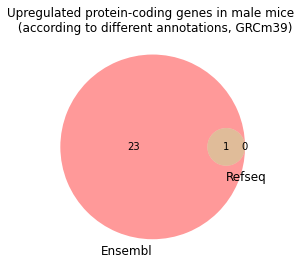

In [401]:
venn2([set(male_ensembl_up[male_ensembl_up.protein_coding == True]['Gene name']), 
       set(male_Refseq_up[male_Refseq_up.protein_coding == True]['Gene name'])], 
      set_labels = ('Ensembl', 'Refseq'))
plt.title("Upregulated protein-coding genes in male mice \n (according to different annotations, GRCm39)")

Text(0.5, 1.0, 'Down-regalated protein-coding genes in male mice \n (according to different annotations, GRCm39)')

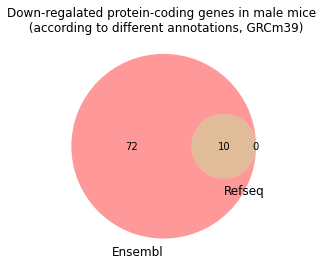

In [403]:
venn2([set(male_ensembl_down[male_ensembl_down.protein_coding == True]['Gene name']), 
       set(male_Refseq_down[male_Refseq_down.protein_coding == True]['Gene name'])], 
      set_labels = ('Ensembl', 'Refseq'))
plt.title("Down-regalated protein-coding genes in male mice \n (according to different annotations, GRCm39)")

In [320]:
gene_info_refseq = pd.read_csv('../ref_genome/mm39/RefSeq/mm39_mouse_Refseq_total_info_length.txt', sep = '\t')

In [334]:
gene_info_refseq.head()

,name,chrom,txStart,txEnd,name2,length,median_start,median_end,max_length,length_from_median_coord,adjusted_length
0,NM_001159711.1,chr1,16758679,16779829,Ly96,21150,16758679.0,16779829.0,21150.0,21150,21151.0
1,NM_016923.2,chr1,16758679,16779829,Ly96,21150,16758679.0,16779829.0,21150.0,21150,21151.0
2,NM_175642.4,chr1,25106556,25868788,Adgrb3,762232,25106630.0,25868709.5,762708.0,762079,762080.5
3,XM_036163221.1,chr1,25106630,25865100,Adgrb3,758470,25106630.0,25868709.5,762708.0,762079,762080.5
4,XM_017319555.3,chr1,25106630,25865561,Adgrb3,758931,25106630.0,25868709.5,762708.0,762079,762080.5


In [322]:
gene_info_refseq['adjusted_length'] = abs(gene_info_refseq.median_start - gene_info_refseq.median_end) + 1

In [335]:
gene_info_refseq = gene_info_refseq[['name2', 'max_length', 'length_from_median_coord']].drop_duplicates()

In [350]:
male_Refseq.shape

(32334, 10)

In [351]:
male_Refseq = male_Refseq.merge(gene_info_refseq, how='left', right_on='name2', left_on='Gene name')

In [355]:
male_Refseq[male_Refseq.protein_coding == True].max_length.mean()

51054.25053437391

In [366]:
gene_info_ensembl = pd.read_csv('../ref_genome/m39_gene_lengths_protein_coding.csv')

In [367]:
gene_info_ensembl = gene_info_ensembl[['Gene name', 'length_of_the_longest_tr_coord', 'Adjusted_gene_length']]

In [368]:
gene_info_ensembl.head()

,Gene name,length_of_the_longest_tr_coord,Adjusted_gene_length
0,mt-Nd1,957.0,957.0
1,mt-Nd2,1038.0,1038.0
2,mt-Co1,1545.0,1545.0
3,mt-Co2,684.0,684.0
4,mt-Atp8,204.0,204.0


In [365]:
male_ensembl.head()

,Gene name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene stable ID,Gene % GC content,protein_coding
0,C4b,884.716371,-2.956498,0.212674,-13.901526,6.200554e-44,1.380367e-39,ENSMUSG00000073418,54.98,True
1,Lyz2,330.079396,-2.293038,0.243512,-9.416516,4.663037e-21,5.190426e-17,ENSMUSG00000069516,47.08,True
2,Gfap,3998.894233,-1.226660,0.159915,-7.670683,1.710823e-14,1.269545e-10,ENSMUSG00000020932,50.78,True
3,Avp,105.836367,-1.970187,0.271699,-7.251357,4.126180e-13,2.296425e-09,ENSMUSG00000037727,58.60,True
4,H2-K1,456.366097,-1.273633,0.189811,-6.710010,1.946113e-11,7.220729e-08,ENSMUSG00000061232,53.80,True


In [369]:
male_ensembl = male_ensembl.merge(gene_info_ensembl, how='left', right_on='Gene name', left_on='Gene name')

In [372]:
male_ensembl[male_ensembl.protein_coding == True].length_of_the_longest_tr_coord.mean()

48605.38012712058

In [373]:
male_ensembl_up = male_ensembl[(male_ensembl.padj < 0.1) & (male_ensembl.log2FoldChange > 0.14)]

male_ensembl_down = male_ensembl[(male_ensembl.padj < 0.1) & (male_ensembl.log2FoldChange < - 0.42)]

In [375]:
male_Refseq_up = male_Refseq[(male_Refseq.padj < 0.1) & (male_Refseq.log2FoldChange > 0.14)]

male_Refseq_down = male_Refseq[(male_Refseq.padj < 0.1) & (male_Refseq.log2FoldChange < - 0.42)]

In [378]:
male_ensembl_up.head()

,Gene name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Gene stable ID,Gene % GC content,protein_coding,length_of_the_longest_tr_coord,Adjusted_gene_length
15,Sox11,261.477393,0.871674,0.169344,5.147356,2.641831e-07,0.000383,ENSMUSG00000063632,46.48,True,8311.0,8311.0
26,Gpr17,295.851802,1.179157,0.256213,4.602259,4.179321e-06,0.003446,ENSMUSG00000052229,52.88,True,6640.0,6640.0
28,Nr4a1,974.623782,0.980626,0.216492,4.529624,5.908874e-06,0.004536,ENSMUSG00000023034,54.50,True,20527.0,7476.0
29,Egr4,374.002486,0.936623,0.207128,4.521961,6.126934e-06,0.004547,ENSMUSG00000071341,68.29,True,2469.0,2469.0
36,Arc,2305.863940,1.019709,0.232300,4.389614,1.135520e-05,0.006652,ENSMUSG00000022602,58.80,True,3488.0,3487.0


(-2000.0, 100000.0)

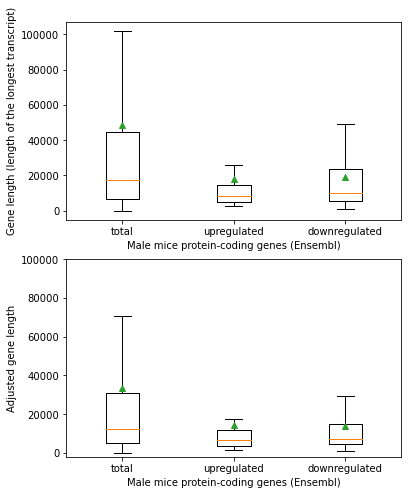

In [380]:
fig, axs = plt.subplots(2, 1, figsize=(6, 8))


box0 = axs[0].boxplot([male_ensembl[male_ensembl.protein_coding == True].length_of_the_longest_tr_coord, 
                      male_ensembl_up[male_ensembl_up.protein_coding == True].length_of_the_longest_tr_coord,
                      male_ensembl_down[male_ensembl_down.protein_coding == True].length_of_the_longest_tr_coord], 
                      showfliers=False, showmeans=True, 
                     labels=['total', 'upregulated', 'downregulated'])

axs[0].set_ylabel('Gene length (length of the longest transcript)')
axs[0].set_xlabel('Male mice protein-coding genes (Ensembl)')


box1 = axs[1].boxplot([male_ensembl[male_ensembl.protein_coding == True].Adjusted_gene_length, 
                      male_ensembl_up[male_ensembl_up.protein_coding == True].Adjusted_gene_length,
                      male_ensembl_down[male_ensembl_down.protein_coding == True].Adjusted_gene_length], 
                      showfliers=False, showmeans=True, 
                     labels=['total', 'upregulated', 'downregulated'])

axs[1].set_xlabel('Male mice protein-coding genes (Ensembl)')
axs[1].set_ylabel('Adjusted gene length')
axs[1].set_ylim(-2000,100000)

Text(0.5, 1.0, 'Ensembl annotation')

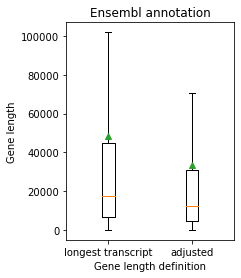

In [396]:
fig, axs = plt.subplots(1, 1, figsize=(3, 4))

axs.boxplot([male_ensembl[male_ensembl.protein_coding == True].length_of_the_longest_tr_coord, 
             male_ensembl[male_ensembl.protein_coding == True].Adjusted_gene_length], 
            showfliers=False, showmeans=True, 
                     labels=['longest transcript', 'adjusted'])

axs.set_ylabel('Gene length')
axs.set_xlabel('Gene length definition')
axs.set_title('Ensembl annotation')

In [397]:
stat, p = scipy.stats.mannwhitneyu(male_ensembl[male_ensembl.protein_coding == True].length_of_the_longest_tr_coord.values, 
                                   male_ensembl[male_ensembl.protein_coding == True].Adjusted_gene_length.values, 
                                   alternative='two-sided')
print(p)

7.842797448884643e-125


Text(0.5, 1.0, 'Lengths of differentially expressed genes \n (male mice, Ensembl)')

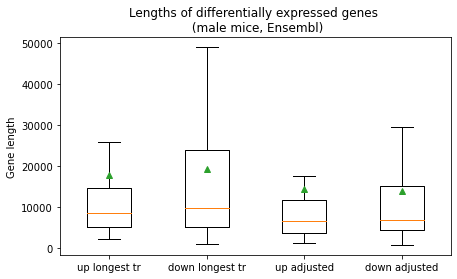

In [389]:
fig, axs = plt.subplots(1, 1, figsize=(7, 4))

axs.boxplot([male_ensembl_up[male_ensembl_up.protein_coding == True].length_of_the_longest_tr_coord, 
             male_ensembl_down[male_ensembl_down.protein_coding == True].length_of_the_longest_tr_coord, 
             male_ensembl_up[male_ensembl_up.protein_coding == True].Adjusted_gene_length,
            male_ensembl_down[male_ensembl_down.protein_coding == True].Adjusted_gene_length], showfliers=False, showmeans=True, 
                     labels=['up longest tr', 'down longest tr', 'up adjusted', 'down adjusted'])

axs.set_ylabel('Gene length')
axs.set_title('Lengths of differentially expressed genes \n (male mice, Ensembl)')

In [392]:
stat, p = scipy.stats.mannwhitneyu(male_ensembl_up[male_ensembl_up.protein_coding == True].length_of_the_longest_tr_coord.values, 
                                   male_ensembl_up[male_ensembl_up.protein_coding == True].Adjusted_gene_length.values, 
                                   alternative='two-sided')
print(p)

0.2316313567568674


In [393]:
stat, p = scipy.stats.mannwhitneyu(male_ensembl_up[male_ensembl_up.protein_coding == True].length_of_the_longest_tr_coord.values, 
                                   male_ensembl_down[male_ensembl_down.protein_coding == True].length_of_the_longest_tr_coord.values, 
                                   alternative='two-sided')
print(p)

0.6974458502197878


In [394]:
stat, p = scipy.stats.mannwhitneyu(male_ensembl_down[male_ensembl_down.protein_coding == True].length_of_the_longest_tr_coord.values, 
                                   male_ensembl_down[male_ensembl_down.protein_coding == True].Adjusted_gene_length.values, 
                                   alternative='two-sided')
print(p)

0.07228163201976041


In [395]:
stat, p = scipy.stats.mannwhitneyu(male_ensembl_up[male_ensembl_up.protein_coding == True].Adjusted_gene_length.values, 
                                   male_ensembl_down[male_ensembl_down.protein_coding == True].Adjusted_gene_length.values, 
                                   alternative='two-sided')
print(p)

0.581582756447039
